ColDefs(
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    name = 'STARFLAG'; fo

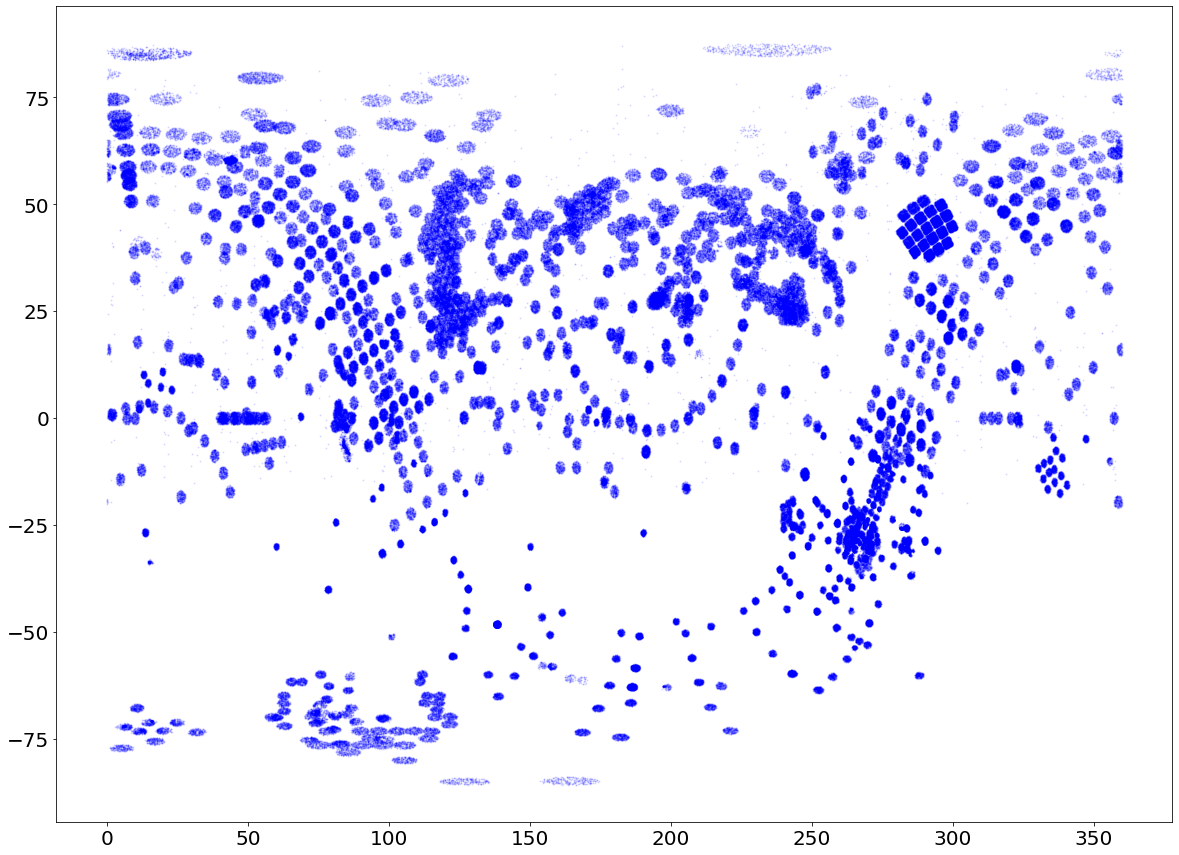

In [10]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStarLite-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]

gd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0)&\
      (np.bitwise_and(star['starflag'], suspectbits)==0)&\
(star['GLAT']>=-1)&(star['GLAT']<=1)
good2 = np.where(gd2)[0]

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

In [11]:
#linear gausian
def Fit_2(function, x, y, x_err, y_err, p0): 
    a = list()
    b = list()
    for i in range (0, 500):
        weights_x = np.random.randn(len(x))
        weights_y = np.random.randn(len(y))
        x_adj = x + x_err*weights_x
        y_adj = y + y_err*weights_y
        popt, pcov = opt.curve_fit(function, x_adj, y_adj, p0=p0)
        a.append(popt[0])
        b.append(popt[1])
    return a, b

#poly2 and lorentzian
def Fit_3(function, x, y, x_err, y_err, p0): 
    a = list()
    b = list()
    c = list()
    for i in range (0, 500):
        weights_x = np.random.randn(len(x))
        weights_y = np.random.randn(len(y))
        x_adj = x + x_err*weights_x
        y_adj = y + y_err*weights_y
        popt, pcov = opt.curve_fit(function, x_adj, y_adj, p0=p0)
        a.append(popt[0])
        b.append(popt[1])
        c.append(popt[2])
    return a, b, c

#poly3, exponential, cosfit, logfit, and sigmoid
def Fit_4(function, x, y, x_err, y_err, p0): 
    a = list()
    b = list()
    c = list()
    d = list()
    for i in range (0, 100):
        weights_x = np.random.randn(len(x))
        weights_y = np.random.randn(len(y))
        x_adj = x + x_err*weights_x
        y_adj = y + y_err*weights_y
        popt, pcov = opt.curve_fit(function, x_adj, y_adj, p0=p0)
        a.append(popt[0])
        b.append(popt[1])
        c.append(popt[2])
        d.append(popt[3])
    return a, b, c, d

Part a:

<ipython-input-10-f58a4af35639>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


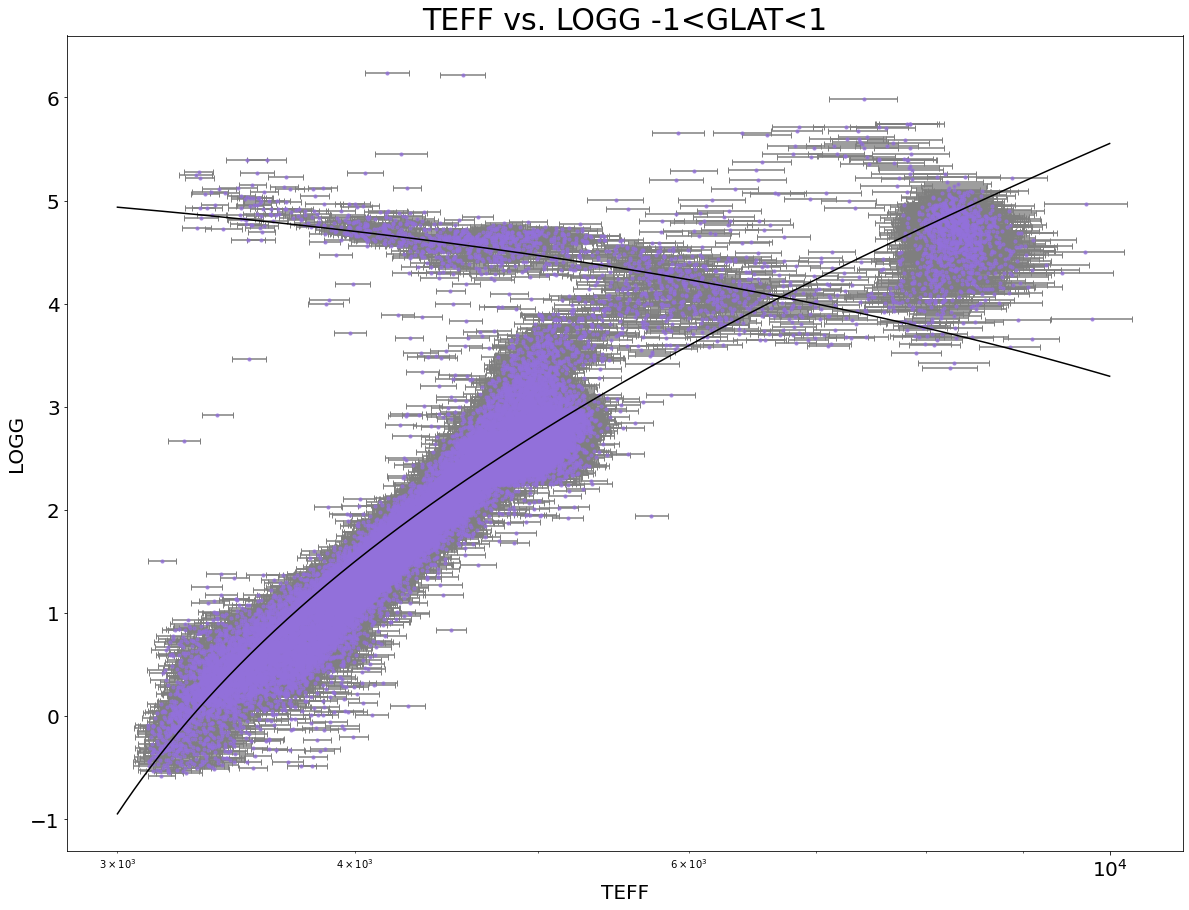

In [12]:

#-1<GLAT<1 for TEFF and LOGG
mask1 = (np.absolute(star['GLAT'])>-1.0)&(np.absolute(star['GLAT'])<1.0)&(star['TEFF']>0)&(star['LOGG']>-1000)
maska = (np.absolute(star['GLAT'])>-1.0)&(np.absolute(star['GLAT'])<1.0)&(star['TEFF']>0)&(star['TEFF']<7000)&(star['LOGG']>3.75)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][mask1], star['LOGG'][mask1] ,s=10,c='mediumpurple',alpha=0.7)
ax.errorbar(star['TEFF'][mask1], star['LOGG'][mask1],xerr=star['TEFF_ERR'][mask1], c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('TEFF vs. LOGG -1<GLAT<1', size=30)
ax.set_xlabel('TEFF', size = 20)
ax.set_ylabel('LOGG', size = 20)

xlin = np.linspace(3000, 10000, 10000)
#Fit TEFF (TEFF_ERR) vs. LogG (LOGG_ERR)
a, b, c, d = Fit_4(logfit, star['TEFF'][mask1], star['LOGG'][mask1], star['TEFF_ERR'][mask1], star['LOGG_ERR'][mask1], [1,1,1,1])
ax.plot(xlin, logfit(xlin, np.mean(a), np.mean(b), np.mean(c), np.mean(d)), c='black')

m, b = Fit_2(linear, star['TEFF'][maska], star['LOGG'][maska], star['TEFF_ERR'][maska], star['LOGG_ERR'][maska], [1,1])
ax.plot(xlin, linear(xlin, np.mean(m), np.mean(b)), c='black')

plt.xscale('log')
plt.show()

Part b:

ValueError: `ydata` must not be empty!

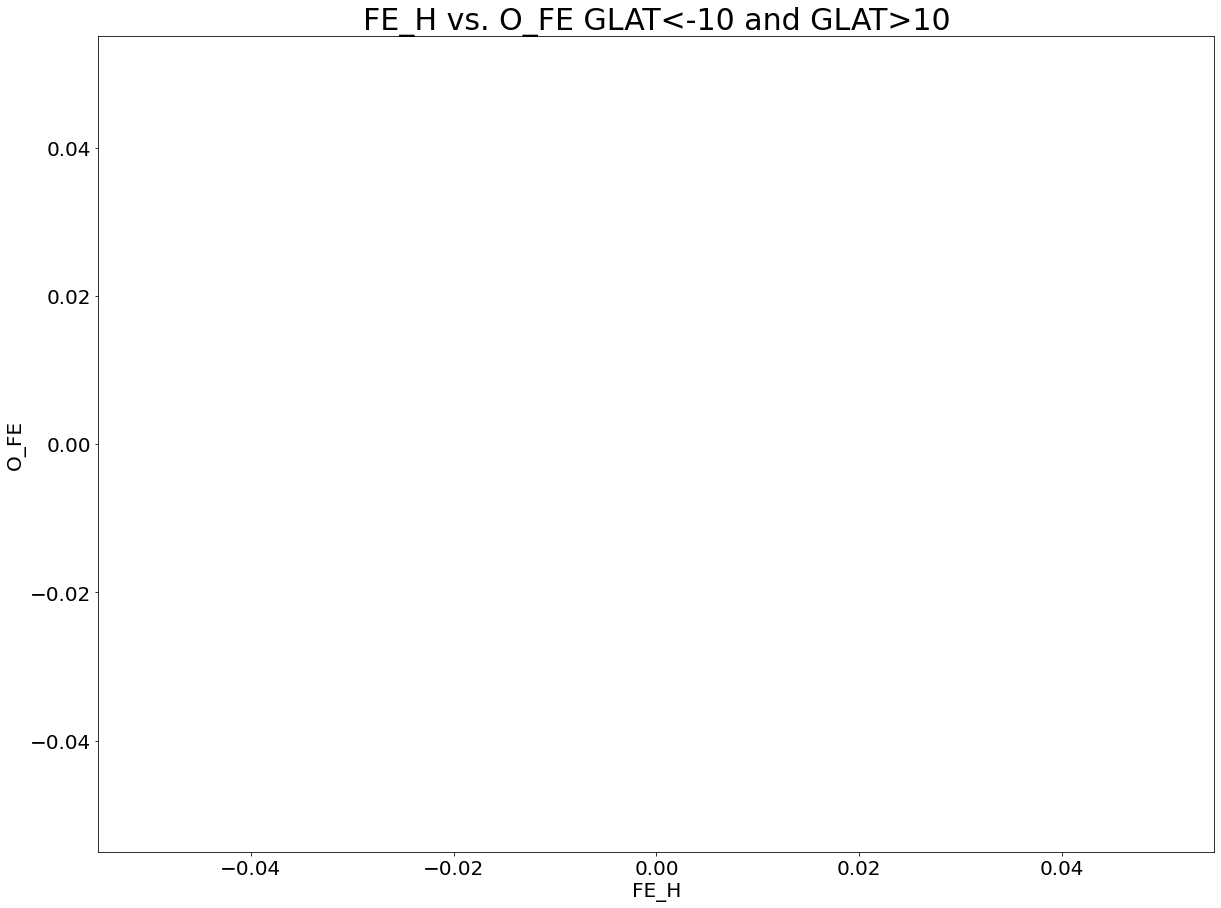

In [13]:
#Select stars only with with -10<GLAT<10
mask2 = (((star['GLAT'])<-10) & ((star['O_FE'])>-5000)) & ((star['GLAT']>10.0)& (star['O_FE']>-5000))

fig =plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][mask2], star['O_FE'][mask2], s=10, c='mediumpurple',alpha=0.7)
ax.errorbar(star['FE_H'][mask2], star['O_FE'][mask2],xerr=star['FE_H_ERR'][mask2], c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)
                                                            
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('FE_H vs. O_FE GLAT<-10 and GLAT>10', size=30)
ax.set_xlabel('FE_H', size = 20)
ax.set_ylabel('O_FE', size = 20)      
                                                            
#FitFe_H, (Fe_H_ERR) vs. O_FE (O_FE_ERR)
xlin = np.linspace(-3, 1, 100)
a, b, c, d = Fit_4(poly3, star['FE_H'][mask2], star['O_FE'][mask2], star['FE_H_ERR'][mask2], star['O_FE_ERR'][mask2], [1,1,1,1])
ax.plot(xlin, poly3(xlin, np.mean(a), np.mean(b), np.mean(c), np.mean(d)), c='black')
plt.show()

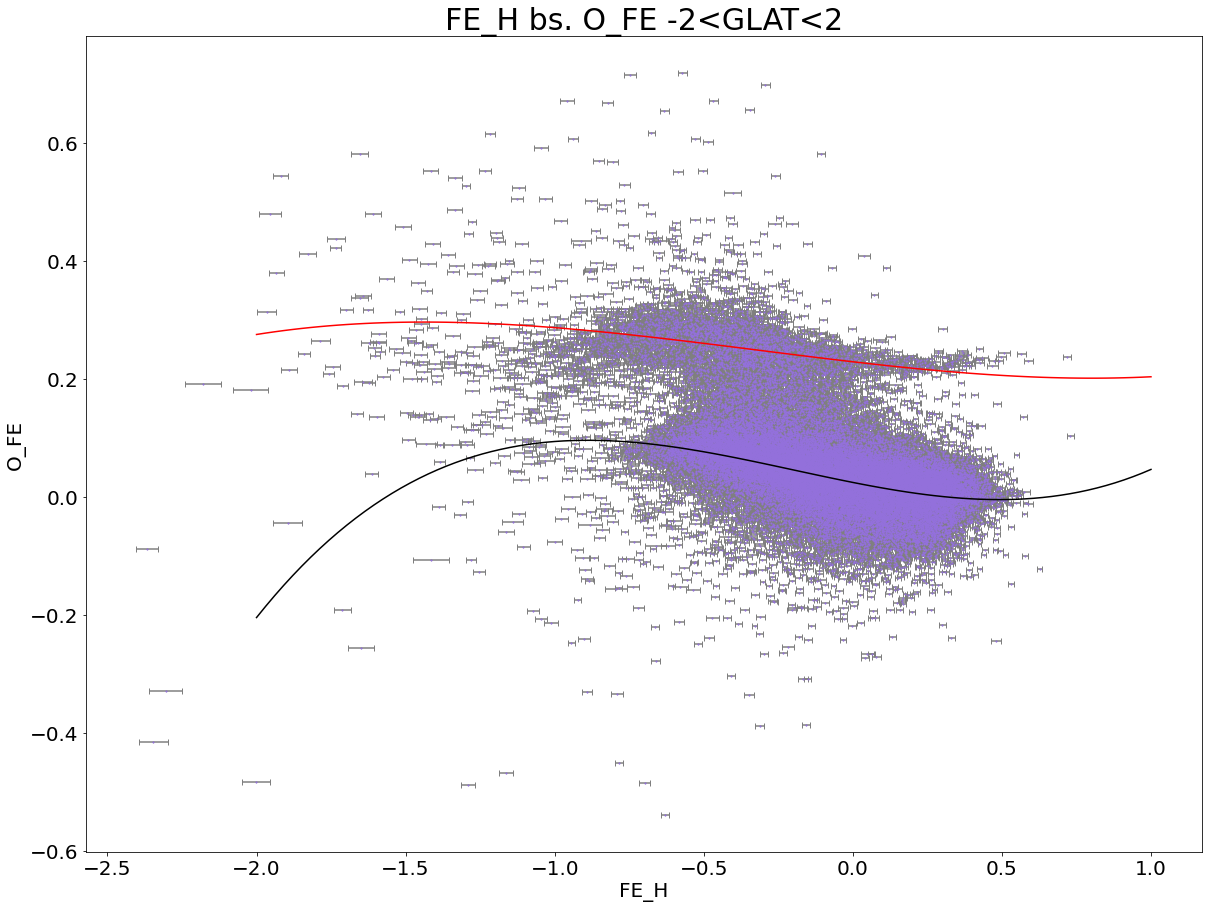

In [14]:
#Select stars only with with -2<GLAT<2
mask3 = (np.absolute(star['GLAT'])<2.0)&(star['O_FE']>-5000)
mask3a = (np.absolute(star['GLAT'])<2.0)&(star['O_FE']>-5000)&(star['O_FE']<0.18)
mask3b = (np.absolute(star['GLAT'])<2.0)&(star['O_FE']>0.18)
fig =plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][mask3], star['O_FE'][mask3], s=1 ,c='mediumpurple',alpha=1)
ax.errorbar(star['FE_H'][mask3], star['O_FE'][mask3],xerr=star['FE_H_ERR'][mask3], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('FE_H bs. O_FE -2<GLAT<2', size=30)
ax.set_xlabel('FE_H', size = 20)
ax.set_ylabel('O_FE', size = 20)
           
#Fit Fe_H, (Fe_H_ERR) vs. O_FE (O_FE_ERR)
xlin = np.linspace(-2, 1, 100)
a, b, c, d = Fit_4(poly3, star['FE_H'][mask3a], star['O_FE'][mask3a], star['FE_H_ERR'][mask3a], star['O_FE_ERR'][mask3a], [1,1,1,1])
ax.plot(xlin, poly3(xlin, np.mean(a), np.mean(b), np.mean(c), np.mean(d)), c='black')

e, f, g, h = Fit_4(poly3, star['FE_H'][mask3b], star['O_FE'][mask3b], star['FE_H_ERR'][mask3b], star['O_FE_ERR'][mask3b], [1,1,1,1])
ax.plot(xlin, poly3(xlin, np.mean(e), np.mean(f), np.mean(g), np.mean(h)), c = 'r')

plt.show()

Part d:

In [15]:
mask4 = (((star['GLAT']<-10)&(star['TEFF']>0)&((star['J']-star['K'])<1000)))&(((star['GLAT'])>10)&star['TEFF']>0&((star['J']-star['K'])<1000))

JminK = star['J'][mask4] - star['K'][mask4]
JminK_ERR = star['J_ERR'][mask4] - star['K_ERR'][mask4]

fig = plt.figure(figsize=(20, 15))
ax = fig.add_suplot(111)
ax.scatter(star['TEFF'][mask4], JminK, s=10, c='mediumpurple')
ax.errorbar(star['TEFF'][mask4], JminK,xerr=star['TEFF_ERR'][mask4], c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)


ax.set_title('TEFF vs. J-K GLAT<-10 and GLAT>10', size = 30)
ax.set_xlabel('TEFF', size = 20)
ax.set_ylabel('J_K', size = 20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

xlin=np.linspace(-10, 3000, 10000)
a, b, c, d = Fit_4(poly3, star['TEFF'][mask4], JminK, star['TEFF_ERR'][mask4], JminK_ERR, [1,1,1,1])
ax.plot(xlin, poly3(xlin, np.mean(a), np.mean(b), np.mean(c), np.mean(d)), c='mediumpurple')

plt.show()

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Part e:

In [16]:
mask5 = (np.absolute(star['GLAT']<10)&(star['VHELIO_AVG']<0.4)
         
fig = plt.figure(figsize=(20,15))
ax = fig.add_suplot(111)
ax.scatter(star['GLON'][mask5], star['VHELIO_AVG'][mask5], s=10, c='mediumpurple')
ax.errorbar(star['GLON'][mask4], star['VHELIO_AVG'][mask5], xerr=star['VERR'][mask5], c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)  

ax.set_title('GLON vs. VHELIO_AVG -10<GLAT<10', size=30)
ax.set_xlabel('GLON', size=20)
ax.set_ylabel('VHELIO_AVG', size=20)

xlin=np.linspace(0, 400, 600)
a, b, c, d = Fit_4(cosfit, star['GLON'][mask5], star['VHELIO_AVG'][mask5],0, star['VERR'], [1,1])
ax.plot(xlin, cosfit(xlin, np.mean(a), np.mean(b), np.mea(c), np.mean(d)), c = 'mediumpurple')
         
plt.show()

SyntaxError: invalid syntax (<ipython-input-16-4cb1ddf23b4d>, line 2)